In [1]:
import os
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = "99"

In [2]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 16047560861510336950]

# Testing enviromnment

In [14]:
#display the log information.

# Test with a simple computation
import tensorflow as tf

tf.Session()

with tf.device('/cpu:0'):
    a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3])
# If you have gpu you can try this line to compute b with your GPU
#with tf.device('/gpu:0'):    
    b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2])
c = tf.matmul(a, b)
# Creates a session with log_device_placement set to True.
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

print(sess.run(c))

# Runs the op.
# Log information
options = tf.RunOptions(output_partition_graphs=True)
metadata = tf.RunMetadata()
c_val = sess.run(c, options=options, run_metadata=metadata)

print(metadata.partition_graphs)

sess.close()

[[22. 28.]
 [49. 64.]]
[node {
  name: "MatMul_1"
  op: "Const"
  device: "/job:localhost/replica:0/task:0/device:CPU:0"
  attr {
    key: "dtype"
    value {
      type: DT_FLOAT
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_FLOAT
        tensor_shape {
          dim {
            size: 2
          }
          dim {
            size: 2
          }
        }
        tensor_content: "\000\000\260A\000\000\340A\000\000DB\000\000\200B"
      }
    }
  }
  experimental_debug_info {
    original_node_names: "MatMul_1"
  }
}
node {
  name: "_retval_MatMul_1_0_0"
  op: "_Retval"
  input: "MatMul_1"
  device: "/job:localhost/replica:0/task:0/device:CPU:0"
  attr {
    key: "T"
    value {
      type: DT_FLOAT
    }
  }
  attr {
    key: "index"
    value {
      i: 0
    }
  }
  experimental_debug_info {
    original_node_names: "_retval_MatMul_1_0_0"
  }
}
library {
}
versions {
  producer: 27
}
]


In [ ]:
#Imports

In [4]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import itertools

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import matplotlib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

tf.logging.set_verbosity(tf.logging.INFO)


# Reading CSV file and diving it into Train and test data 
#Dropping columns like id and member_id which will not be used for modelling

In [15]:
sess = tf.InteractiveSession()
df = pd.read_csv("loan_cleaned.csv", low_memory=False)
df.shape
train = df[0:849999] # Train on first 850 rows
test = df[850000:] # Train on first 37k rows
#prediction = df[:] # Predict on final 37k rows

print('Shape of the train data with all features:', train.shape)
train = train.select_dtypes(exclude=['object'])
print("")
print('Shape of the train data with numerical features:', train.shape)
#Removing id and member id
train.drop('id',axis = 1, inplace = True)
train.drop('member_id',axis = 1, inplace = True)
train.fillna(0,inplace=True)

test = test.select_dtypes(exclude=['object'])
ID = test.id
member_id=test.member_id
#Removing id and member id
test.drop('id',axis = 1, inplace = True)
test.drop('member_id',axis = 1, inplace = True)

test.fillna(0,inplace=True)

print("")
print("List of features contained our dataset:",list(train.columns))



Shape of the train data with all features: (849999, 138)

Shape of the train data with numerical features: (849999, 138)

List of features contained our dataset: ['loan_amnt', 'funded_amnt_inv', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'total_acc', 'total_pymnt', 'total_pymnt_inv', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'ANY', 'MORTGAGE', 'NONE', 'OTHER', 'OWN', 'RENT', 'Not_Verified', 'Source_Verified', 'Verified', 'car', 'credit_card', 'debt_consolidation', 'educational', 'home_improvement', 'house', 'major_purchase', 'medical', 'moving', 'other', 'renewable_energy', 'small_business', 'vacation', 'wedding', 'Charged_off', 'Current', 'Default', 'Does_not_meet_the_credit_policy_Status_charged_off', 'Does_not_meet_the_credit_policy_status_Fully_Paid', 'Fully_paid', 'In_Gr

In [16]:
print('Shape of the train data with numerical features:', train.shape)
print('Shape of the test data with numerical features:', test.shape)

Shape of the train data with numerical features: (849999, 136)
Shape of the test data with numerical features: (37379, 136)


#Isolation of the outliers using  IsolationForest library

In [17]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(max_samples = 100, random_state = 42)
clf.fit(train)
y_noano = clf.predict(train)
y_noano = pd.DataFrame(y_noano, columns = ['Top'])
y_noano[y_noano['Top'] == 1].index.values

train = train.iloc[y_noano[y_noano['Top'] == 1].index.values]
train.reset_index(drop = True, inplace = True)
print("Number of Outliers:", y_noano[y_noano['Top'] == -1].shape[0])
print("Number of rows without outliers:", train.shape[0])


C:\Users\honra\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
C:\Users\honra\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
C:\Users\honra\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


Number of Outliers: 85000
Number of rows without outliers: 764999


In [18]:
train.head(10)
#Dropping int_rate column from test data
test_int_rate=test['int_rate']
test.drop('int_rate',axis=1,inplace=True)

In [40]:
train.head(5)

,loan_amnt,funded_amnt_inv,annual_inc,dti,delinq_2yrs,inq_last_6mths,total_acc,total_pymnt,total_pymnt_inv,A,...,TN,TX,UT,VA,VT,WA,WI,WV,WY,int_rate
0,0.130435,0.142143,0.002526,0.002765,0.0,0.030303,0.047619,0.103171,0.103263,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.225180
1,0.055072,0.068571,0.001290,0.000872,0.0,0.060606,0.053571,0.052873,0.053185,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.449514
2,0.275362,0.285714,0.005179,0.002000,0.0,0.030303,0.214286,0.215218,0.216490,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.345163
3,0.072464,0.085714,0.008421,0.001794,0.0,0.000000,0.220238,0.057071,0.057409,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.311365
4,0.130435,0.142857,0.003789,0.001120,0.0,0.090909,0.065476,0.099128,0.099714,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.108999


In [19]:
import warnings
warnings.filterwarnings('ignore')

col_train = list(train.columns)
col_train_bis = list(train.columns)

col_train_bis.remove('int_rate')
#COnverting datframe to a matrix
mat_train = np.matrix(train)
mat_test  = np.matrix(test)
mat_new = np.matrix(train.drop('int_rate',axis = 1))
mat_y = np.array(train.int_rate).reshape((764999,1))

prepro_y = MinMaxScaler()
prepro_y.fit(mat_y)

prepro = MinMaxScaler()
prepro.fit(mat_train)

prepro_test = MinMaxScaler()
prepro_test.fit(mat_new)

print('mat_train',type(mat_train),mat_train.shape,'col_train',len(col_train))
print('mat_test',type(mat_test),mat_test.shape,'col_train',len(col_train_bis))


train = pd.DataFrame(prepro.transform(mat_train),columns = col_train)
test  = pd.DataFrame(prepro_test.transform(mat_test),columns = col_train_bis)

train.head()


mat_train <class 'numpy.matrixlib.defmatrix.matrix'> (764999, 136) col_train 136
mat_test <class 'numpy.matrixlib.defmatrix.matrix'> (37379, 135) col_train 135


,loan_amnt,funded_amnt_inv,annual_inc,dti,delinq_2yrs,inq_last_6mths,total_acc,total_pymnt,total_pymnt_inv,A,...,TN,TX,UT,VA,VT,WA,WI,WV,WY,int_rate
0,0.130435,0.142143,0.002526,0.002765,0.0,0.030303,0.047619,0.103171,0.103263,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.225180
1,0.055072,0.068571,0.001290,0.000872,0.0,0.060606,0.053571,0.052873,0.053185,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.449514
2,0.275362,0.285714,0.005179,0.002000,0.0,0.030303,0.214286,0.215218,0.216490,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.345163
3,0.072464,0.085714,0.008421,0.001794,0.0,0.000000,0.220238,0.057071,0.057409,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.311365
4,0.130435,0.142857,0.003789,0.001120,0.0,0.090909,0.065476,0.099128,0.099714,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.108999


In [21]:
# List of features
COLUMNS = col_train
FEATURES = col_train_bis
LABEL = "int_rate"

# Columns for tensorflow
feature_cols = [tf.contrib.layers.real_valued_column(k) for k in FEATURES]

# Training set and Prediction set with the features to predict
training_set = train[COLUMNS]
prediction_set = train.int_rate

# Train and Test 
x_train, x_test, y_train, y_test = train_test_split(training_set[FEATURES] , prediction_set, test_size=0.33, random_state=42)
y_train = pd.DataFrame(y_train, columns = [LABEL])
training_set = pd.DataFrame(x_train, columns = FEATURES).merge(y_train, left_index = True, right_index = True)
training_set.head()

# Training for submission
training_sub = training_set[col_train]

In [22]:
# Same thing but for the test set
y_test = pd.DataFrame(y_test, columns = [LABEL])
testing_set = pd.DataFrame(x_test, columns = FEATURES).merge(y_test, left_index = True, right_index = True)
testing_set.head()

,loan_amnt,funded_amnt_inv,annual_inc,dti,delinq_2yrs,inq_last_6mths,total_acc,total_pymnt,total_pymnt_inv,A,...,TN,TX,UT,VA,VT,WA,WI,WV,WY,int_rate
723937,0.275362,0.285714,0.005895,0.003183,0.0,0.000000,0.101190,0.036719,0.036936,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.366286
611210,0.217391,0.228571,0.014211,0.001427,0.0,0.030303,0.089286,0.026865,0.027024,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.162653
7613,0.275362,0.285714,0.005263,0.001166,0.0,0.000000,0.101190,0.211451,0.212702,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.324039
239510,0.597826,0.603571,0.006947,0.002808,0.0,0.000000,0.178571,0.191673,0.192806,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.387410
243462,0.281159,0.291429,0.005263,0.001774,0.0,0.000000,0.184524,0.094911,0.095473,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.463456


In [23]:
# Using DNNregressor model
tf.logging.set_verbosity(tf.logging.ERROR)
regressor = tf.contrib.learn.DNNRegressor(feature_columns=feature_cols, 
                                          activation_fn = tf.nn.relu, hidden_units=[200, 100, 50, 25, 12])#,
                                         #optimizer = tf.train.GradientDescentOptimizer( learning_rate= 0.1 ))

In [24]:
# Reset the index of training
training_set.reset_index(drop = True, inplace =True)

In [25]:
def input_fn(data_set, pred = False):  
    if pred == False:
        
        feature_cols = {k: tf.constant(data_set[k].values) for k in FEATURES}
        labels = tf.constant(data_set[LABEL].values)
        
        return feature_cols, labels

    if pred == True:
        feature_cols = {k: tf.constant(data_set[k].values) for k in FEATURES}
        
        return feature_cols

In [28]:
# Deep Neural Network Regressor with the training set which contain the data split by train test split
regressor.fit(input_fn=lambda: input_fn(training_set), steps=10)

DNNRegressor(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._RegressionHead object at 0x000002315C6A57B8>, 'hidden_units': [200, 100, 50, 25, 12], 'feature_columns': (_RealValuedColumn(column_name='loan_amnt', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='funded_amnt_inv', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='annual_inc', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='dti', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='delinq_2yrs', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='inq_last_6mths', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='total_acc', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn

In [29]:
# Evaluation on the test set created by train_test_split
ev = regressor.evaluate(input_fn=lambda: input_fn(testing_set), steps=1)

In [30]:
# Display the score on the testing set
# 0.002X in average
loss_score1 = ev["loss"]
print("Final Loss on the testing set: {0:f}".format(loss_score1))

Final Loss on the testing set: 0.004268


In [31]:
# Predictions
y = regressor.predict(input_fn=lambda: input_fn(testing_set))
predictions = list(itertools.islice(y, testing_set.shape[0]))

In [32]:
predictions

[0.39321908,
 0.22190608,
 0.38376522,
 0.37311745,
 0.47299087,
 0.26421437,
 0.26204368,
 0.18112697,
 0.34992927,
 0.22196272,
 0.22795682,
 0.21976407,
 0.22815478,
 0.068958566,
 0.31752595,
 0.11594126,
 0.26396662,
 0.62921363,
 0.110733,
 0.25870064,
 0.4141427,
 0.26510036,
 0.5685901,
 0.11179088,
 0.34289527,
 0.28265703,
 0.49438784,
 0.2717199,
 0.5927938,
 0.12192711,
 0.26655814,
 0.29206616,
 0.17648768,
 0.33408448,
 0.6780517,
 0.230448,
 0.2117968,
 0.5168104,
 0.30181968,
 0.37321293,
 0.26288238,
 0.40526262,
 0.48487428,
 0.47892094,
 0.22842123,
 0.44377157,
 0.5075935,
 0.6872366,
 0.46290463,
 0.05240344,
 0.66787654,
 0.25231314,
 0.39743903,
 0.209147,
 0.24236733,
 0.036985308,
 0.07266448,
 0.07944204,
 0.108527154,
 0.061924968,
 0.06354016,
 0.3917561,
 0.33468574,
 0.6271234,
 0.2581018,
 0.4268794,
 0.22868663,
 0.45244315,
 0.15184122,
 0.23187548,
 0.5315504,
 0.10803439,
 0.3716007,
 0.2553998,
 0.0658026,
 0.15496902,
 0.2614358,
 0.16766134,
 0.161

In [33]:
predictions = pd.DataFrame(prepro_y.inverse_transform(np.array(predictions).reshape(252450,1)),columns = ['Prediction'])

In [34]:
reality = pd.DataFrame(prepro.inverse_transform(testing_set), columns = [COLUMNS]).int_rate

In [35]:
print(predictions[:5])
print(reality[:5])

   Prediction
0   14.627497
1   10.572517
2   14.403723
3   14.151690
4   16.515694
  int_rate
0    13.99
1     9.17
2    12.99
3    14.49
4    16.29


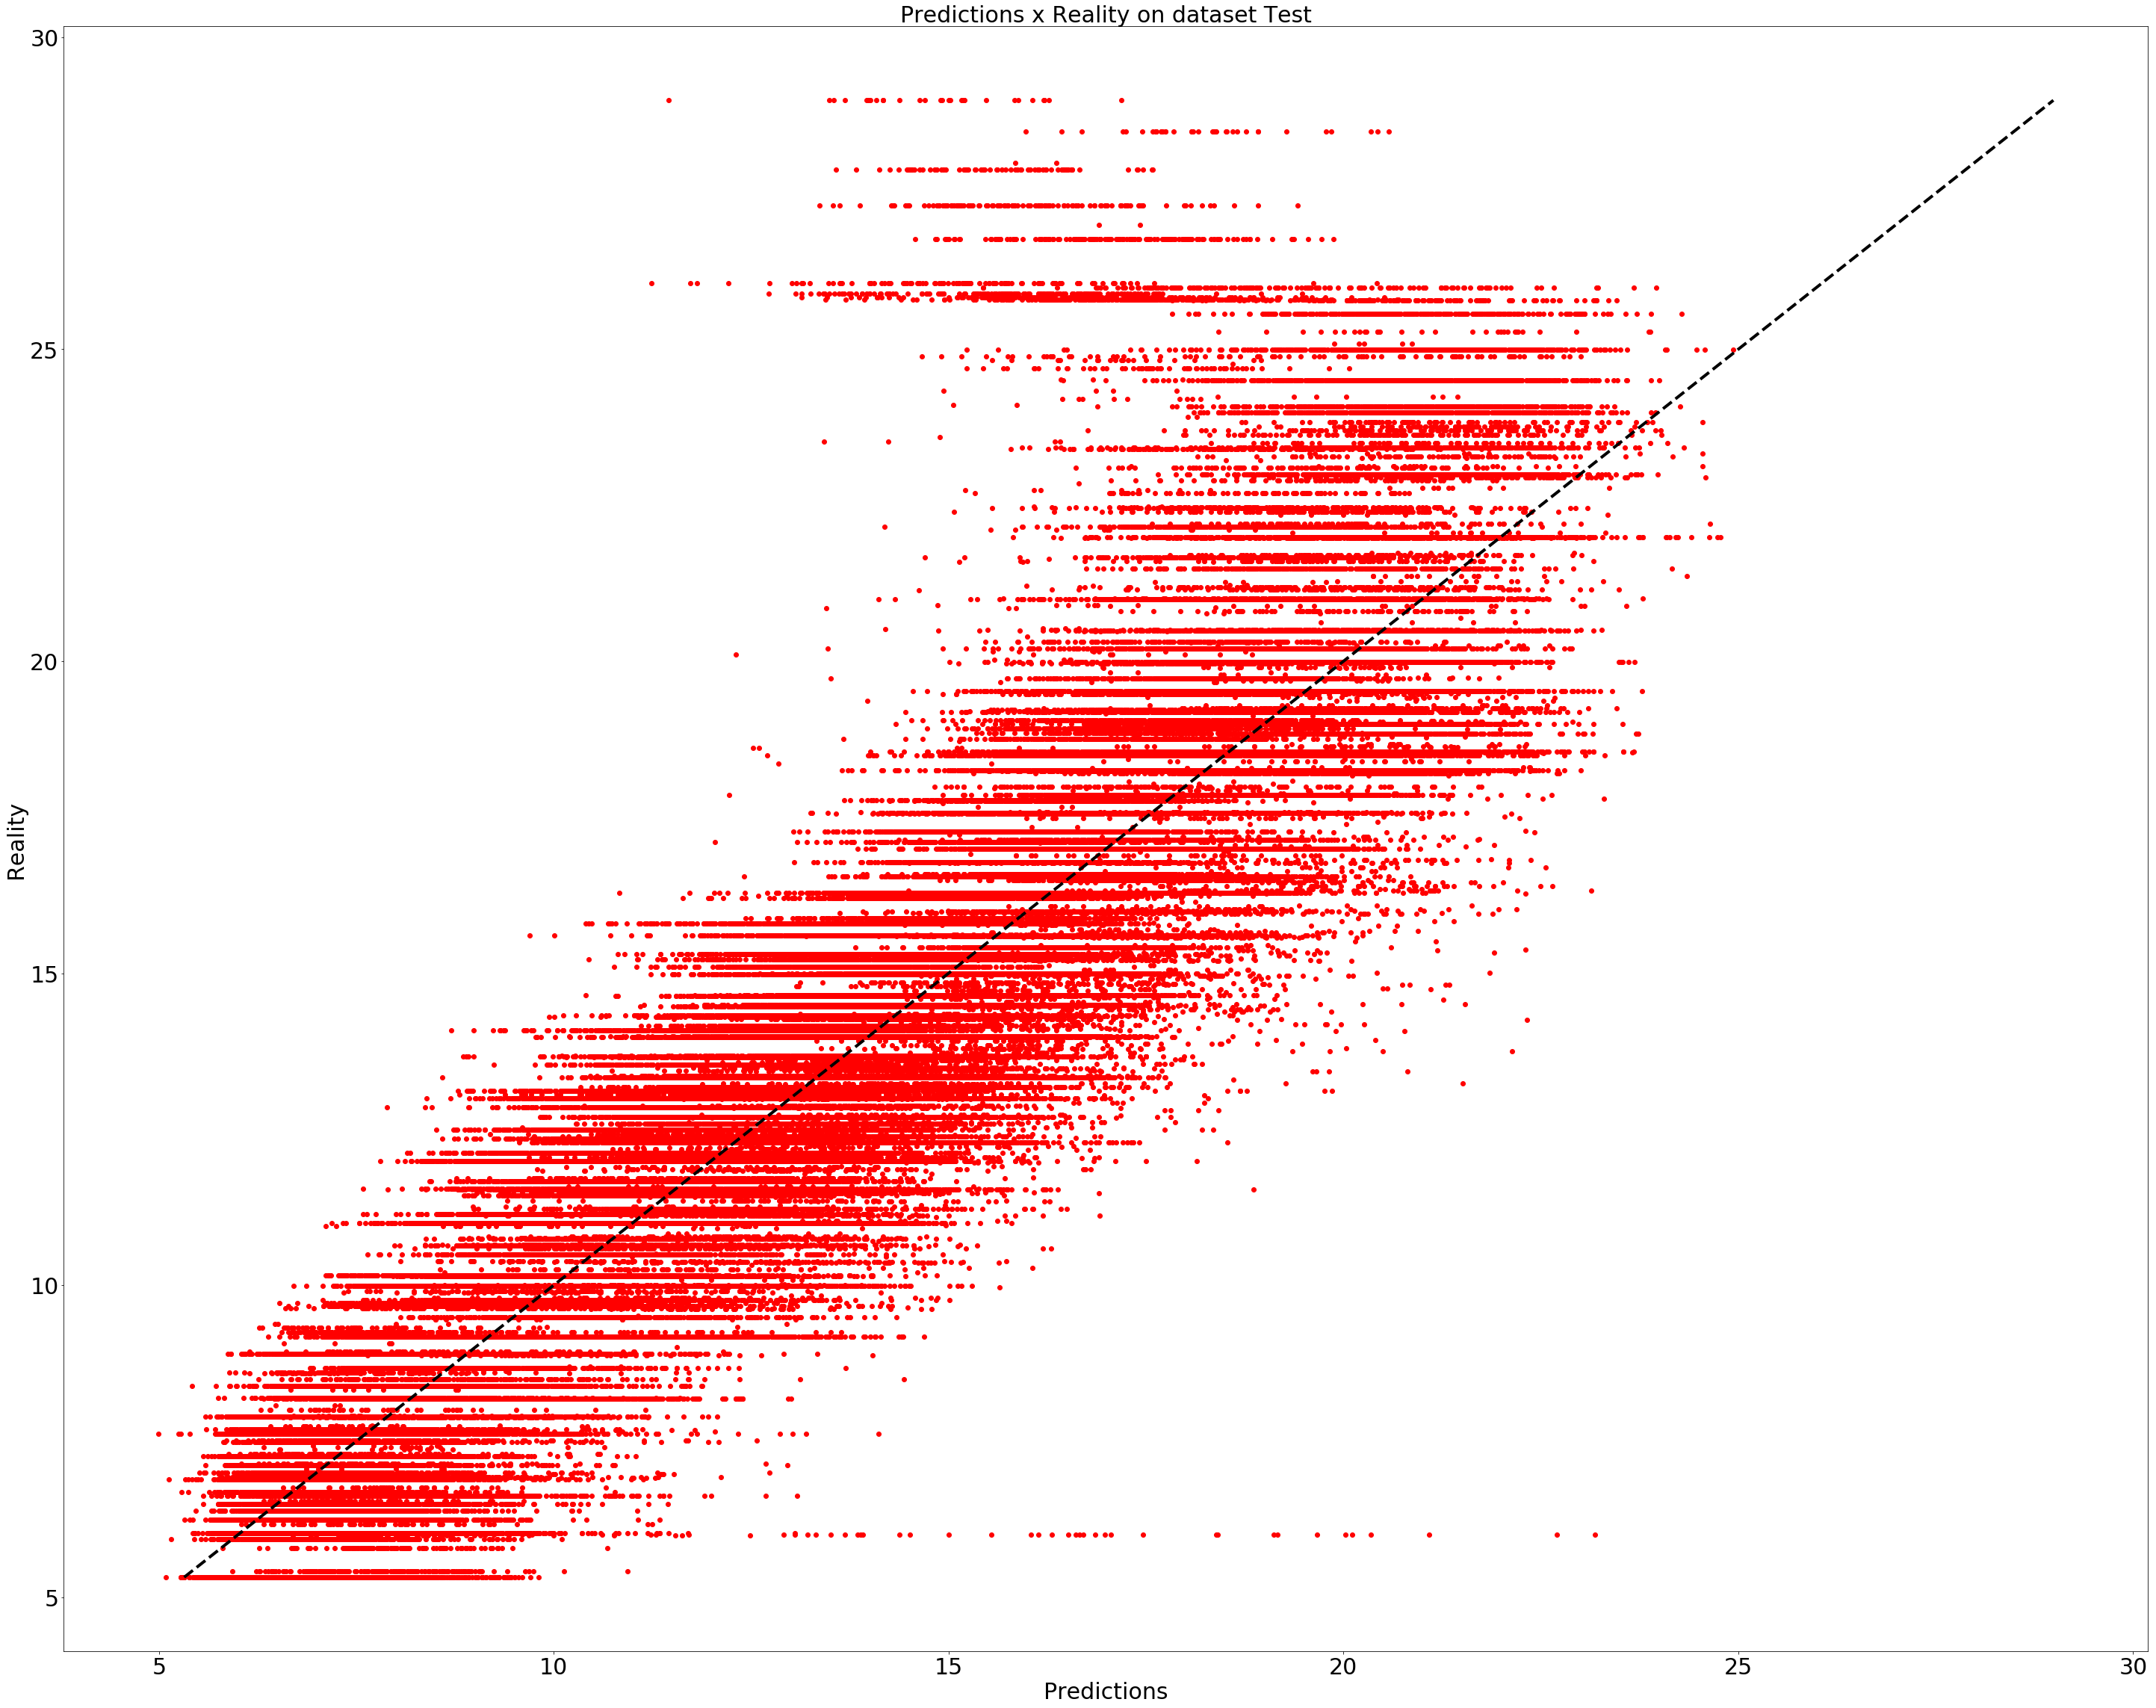

In [36]:
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30) 

fig, ax = plt.subplots(figsize=(50, 40))

plt.style.use('ggplot')
plt.plot(predictions.values, reality.values, 'ro')
plt.xlabel('Predictions', fontsize = 30)
plt.ylabel('Reality', fontsize = 30)
plt.title('Predictions x Reality on dataset Test', fontsize = 30)
ax.plot([reality.min(), reality.max()], [reality.min(), reality.max()], 'k--', lw=4)
plt.show()

In [37]:
def mean_absolute_percentage_error(y_true, y_pred):
   y_true, y_pred = np.array(y_true), np.array(y_pred)
   return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [39]:
print('mean_absolute_percentage_error for Neural network')
print(mean_absolute_percentage_error(reality,predictions))

mean_absolute_percentage_error for Neural network
8.798818776860639


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
neg_mean_sqauared_error_scorer=make_scorer(mean_squared_error,greater_is_better=False)

In [ ]:
accuracies = cross_val_score(estimator = regressor,scoring=mean_squared_error, X = train, y = test, cv = 5 )

In [ ]:
#Reference:https://www.kaggle.com/zoupet/neural-network-model-for-house-prices-tensorflow/comments?scriptVersionId=3552772